# Dogs per Neighborhoods
 
 The WPRDC has a record of all dog licenses in Allegheny county, which includes the zip code of each owner. I used the 2021 dataset to find the zipcodes with the most dogs and then translated those zipcode into neighborhoods.

I imported all the necessary packages first.

In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

Then I imported the data from the WPRDC.

In [2]:
big_dog_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e16d4ab3-842a-4f39-9ad7-ce5921002280")

big_dog_data.head()

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Individual Neutered Male,COCKAPOO,BROWN,CHARLEY,15236,2021,2020-11-30T09:51:38
1,Dog Individual Neutered Male,TAG,WHITE/BLACK/BROWN,BOOMER,15090,2021,2020-11-30T09:55:05
2,Dog Individual Male,American Bully,BROWN,BRUISER,15220,2021,2020-11-30T10:53:39
3,Dog Senior Citizen or Disability Neutered Male,CHIHUAHUA,BLACK,MIDGET,15065,2021,2020-11-30T15:28:45
4,Dog Individual Male,GOLDENDOODLE,BROWN,REX,15237,2021,2020-11-30T15:38:14


The dataset had a lot of unnecessary columns, so I removed them to make life easier.

In [3]:
dog_data_1 = big_dog_data.drop(['LicenseType','Breed','Color','ExpYear','ValidDate','DogName'], axis = 1)

dog_data_1.head()

,OwnerZip
0,15236
1,15090
2,15220
3,15065
4,15237


Then I resorted the data, from the smallest value of zip code to the largest and reset the index.

In [4]:
dog_data = dog_data_1.sort_values('OwnerZip').reset_index(drop=True)

dog_data.head(5)

,OwnerZip
0,15001
1,15003
2,15003
3,15003
4,15003


I used a threshold to include only zip codes that had more than 50 dogs registered, since many zipcodes didn't have more than a few dogs.

In [5]:
dogs_threshold = lambda x, threshold: x['OwnerZip'].count() > threshold

most_dogs = dog_data.groupby("OwnerZip").filter(dogs_threshold, threshold = 50)

most_dogs['OwnerZip'].value_counts()

15108    3499
15237    3494
15102    2838
15235    2778
15044    2738
         ... 
15003      86
15005      75
15047      70
15051      60
15006      52
Name: OwnerZip, Length: 83, dtype: int64

the dataset contained zip codes from all over Allegheny County, way more than what was needed. since the zipcodes are sorted lowest to highest by numerical value, I could easily only include the ones between the lowest and highest within the city limits.

In [6]:
pitt_dogs = most_dogs[49569:815243]

pitt_dogs['OwnerZip'].value_counts()

15237    3494
15235    2778
15236    2451
15239    2185
15227    1960
15241    1806
15202    1471
15205    1434
15221    1421
15228    1392
15229    1347
15238    1229
15209    1198
15243    1137
15216    1115
15234    1058
15215    1024
15220     789
15223     715
15218     713
15214     387
15212     259
16046     251
15210     192
15332     181
15226     125
15225      93
Name: OwnerZip, dtype: int64

Since I could find no easy way to figure out which zip codes were related to each neighborhood, I made a dictionary to assign each zipcode to any neighborhoods it contains. The zeros indicate a zipcode that is not within the city limits.

In [7]:
zip_hoods = {
    15237 : 0,
    15235 : ['Penn Hills','Churchill', 'Lincoln-Lemington-Belmar'],
    15236 : 0,
    15239 : 0,
    15227 : ['Brentwood', 'Baldwin', 'Whitehall'],
    15241 : 0,
    15202 : 0,
    15205 : 0,
    15221 : ['Brushton', 'Homewood','East Hills'],
    15228 : 0,
    15229 : 0,
    15238 : 0,
    15209 : 0,
    15243 : 0,
    15216 : ['Beechview'],
    15234 : ['Overbrook'],
    15215 : ['Sharpsburg', 'Aspinwall'],
    15220 : ['West End', 'Wabash', 'Westwood', 'Banksville'],
    15223 : 0,
    15218 : ['Regent Square', 'Swisshelm Park'],
    15214 : ['Northside'],
    15212 : ['Northside'],
    15210 : ['Knoxville', 'Beltzhoover','Carrick', 'Arlington'],
    15226 : ['Brookline', 'Overbrook'],
    15225 : 0
}

I then made the dictionary into a dataframe so that I could easily merge it with the original dataframe. After doing so, I removed all the zip codes that were not valid, leaving only 11.

In [8]:
dogs_hoods = pd.DataFrame(list(zip_hoods.items()),columns = ['OwnerZip','Neighborhood'])

city_dogs_hoods = pitt_dogs.merge(dogs_hoods, left_on = 'OwnerZip', right_on = 'OwnerZip')

city_dogs_hoods = city_dogs_hoods[city_dogs_hoods.Neighborhood != 0]

city_dogs_hoods['Neighborhood'].value_counts()

[Penn Hills, Churchill, Lincoln-Lemington-Belmar]    2778
[Brentwood, Baldwin, Whitehall]                      1960
[Brushton, Homewood, East Hills]                     1421
[Beechview]                                          1115
[Overbrook]                                          1058
[Sharpsburg, Aspinwall]                              1024
[West End, Wabash, Westwood, Banksville]              789
[Regent Square, Swisshelm Park]                       713
[Northside]                                           646
[Knoxville, Beltzhoover, Carrick, Arlington]          192
[Brookline, Overbrook]                                125
Name: Neighborhood, dtype: int64

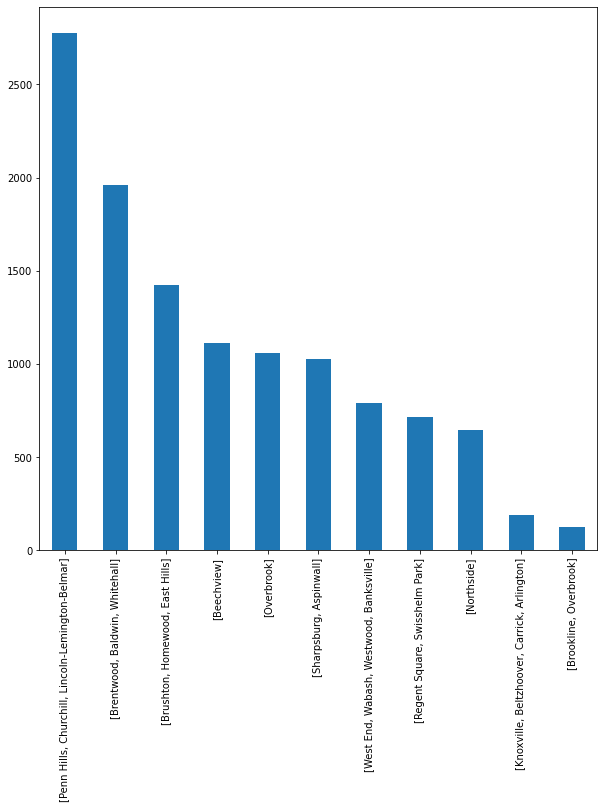

In [9]:
city_dogs_hoods['Neighborhood'].value_counts().plot.bar(figsize=(10,10))

# Conclusion 
The neighborhoods with the most dogs within Pittsburgh are Penn Hills, Chuchill, Lincoln-Lemington-Belmar with 2778 licensed dogs, followed by Brentwood, Baldwin, and Whitehall with 1960. If you want your dog to be super popular and have lots of friends, these would be the best neighborhoods to choose!